# importing required liberaries

In [80]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# reading csv_data


In [81]:
df = pd.read_csv("Spotify most streamed.csv")
df.head()

,Artist and Title,Streams,Daily
0,The Weeknd - Blinding Lights,"3,783,983,806","1,736,378"
1,Ed Sheeran - Shape of You,"3,616,649,759","1,135,140"
2,Lewis Capaldi - Someone You Loved,"2,958,875,491","1,522,093"
3,Post Malone - Sunflower,"2,898,311,408","1,871,177"
4,Tones And I - Dance Monkey,"2,896,024,418","666,818"


# taking a copy of the data

In [82]:
my_copy = df.copy()

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Artist and Title  2500 non-null   object
 1   Streams           2500 non-null   object
 2   Daily             2497 non-null   object
dtypes: object(3)
memory usage: 58.7+ KB


# checking if data has nans values


In [84]:
df.isna().sum()


Artist and Title    0
Streams             0
Daily               3
dtype: int64

# dropping nans 

In [85]:
df.dropna(inplace=True)
df.head()

,Artist and Title,Streams,Daily
0,The Weeknd - Blinding Lights,"3,783,983,806","1,736,378"
1,Ed Sheeran - Shape of You,"3,616,649,759","1,135,140"
2,Lewis Capaldi - Someone You Loved,"2,958,875,491","1,522,093"
3,Post Malone - Sunflower,"2,898,311,408","1,871,177"
4,Tones And I - Dance Monkey,"2,896,024,418","666,818"


# convert object to numeric

In [86]:

df['Daily'] = df['Daily'].str.replace(',','')
df['Daily'] = pd.to_numeric(df['Daily'])
df['Streams'] = df['Streams'].str.replace(',','')
df['Streams'] = pd.to_numeric(df['Streams'])
df.head()

,Artist and Title,Streams,Daily
0,The Weeknd - Blinding Lights,3783983806,1736378
1,Ed Sheeran - Shape of You,3616649759,1135140
2,Lewis Capaldi - Someone You Loved,2958875491,1522093
3,Post Malone - Sunflower,2898311408,1871177
4,Tones And I - Dance Monkey,2896024418,666818


In [87]:
df['Daily'] = pd.to_numeric(df['Daily'])
df['Streams'] = pd.to_numeric(df['Streams'])

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2497 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Artist and Title  2497 non-null   object
 1   Streams           2497 non-null   int64 
 2   Daily             2497 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 78.0+ KB


In [89]:
duplicated_value = df[df.duplicated(subset=['Artist and Title'], keep=False)]
duplicated_value = duplicated_value.sort_values(by='Artist and Title')

duplicated_value


,Artist and Title,Streams,Daily
1023,Ben E. King - Stand by Me,685015674,648270
625,Ben E. King - Stand by Me,888252309,615360
2260,Billie Eilish - Happier Than Ever,428906155,309741
387,Billie Eilish - Happier Than Ever,1101456608,889171
1187,Coldplay - Hymn for the Weekend,632625880,89626
316,Coldplay - Hymn for the Weekend,1203312105,669935
61,Dua Lipa - Levitating,1851093246,976801
713,Dua Lipa - Levitating,824576913,532149
1010,Jack Harlow - WHATS POPPIN,690757010,218360
881,Jack Harlow - WHATS POPPIN,738472431,362115


In [90]:
duplicated_value = duplicated_value.groupby('Artist and Title').agg({'Daily' : 'sum','Streams' : 'sum' })
duplicated_value.reset_index()


,Artist and Title,Daily,Streams
0,Ben E. King - Stand by Me,1263630,1573267983
1,Billie Eilish - Happier Than Ever,1198912,1530362763
2,Coldplay - Hymn for the Weekend,759561,1835937985
3,Dua Lipa - Levitating,1508950,2675670159
4,Jack Harlow - WHATS POPPIN,580475,1429229441
5,Jennifer Lopez - On The Floor,578691,856255740
6,Kendrick Lamar - Swimming Pools (Drank),641798,978517365
7,Lil Nas X - Old Town Road,563356,2407435485
8,Lizzo - Good as Hell,280024,994812535
9,Ozuna - Baila Baila Baila,367839,952464254


In [91]:
df[df.duplicated(subset=['Artist and Title'])].groupby('Artist and Title').agg({'Daily' : 'sum','Streams' : 'sum' })


,Daily,Streams
Artist and Title,,
Ben E. King - Stand by Me,648270,685015674
Billie Eilish - Happier Than Ever,309741,428906155
Coldplay - Hymn for the Weekend,89626,632625880
Dua Lipa - Levitating,532149,824576913
Jack Harlow - WHATS POPPIN,218360,690757010
Jennifer Lopez - On The Floor,161711,406329045
Kendrick Lamar - Swimming Pools (Drank),201943,401159753
Lil Nas X - Old Town Road,281172,948714632
Lizzo - Good as Hell,91054,417922272


In [92]:
df.head()

,Artist and Title,Streams,Daily
0,The Weeknd - Blinding Lights,3783983806,1736378
1,Ed Sheeran - Shape of You,3616649759,1135140
2,Lewis Capaldi - Someone You Loved,2958875491,1522093
3,Post Malone - Sunflower,2898311408,1871177
4,Tones And I - Dance Monkey,2896024418,666818


# Adding Artist and title columns

In [93]:
df['Artist'] = df['Artist and Title'].apply(lambda x : x.split(' - ')[0])
df['Title'] = df['Artist and Title'].apply(lambda x : x.split(' - ')[1])
df.head()

,Artist and Title,Streams,Daily,Artist,Title
0,The Weeknd - Blinding Lights,3783983806,1736378,The Weeknd,Blinding Lights
1,Ed Sheeran - Shape of You,3616649759,1135140,Ed Sheeran,Shape of You
2,Lewis Capaldi - Someone You Loved,2958875491,1522093,Lewis Capaldi,Someone You Loved
3,Post Malone - Sunflower,2898311408,1871177,Post Malone,Sunflower
4,Tones And I - Dance Monkey,2896024418,666818,Tones And I,Dance Monkey


In [94]:
df.head()

,Artist and Title,Streams,Daily,Artist,Title
0,The Weeknd - Blinding Lights,3783983806,1736378,The Weeknd,Blinding Lights
1,Ed Sheeran - Shape of You,3616649759,1135140,Ed Sheeran,Shape of You
2,Lewis Capaldi - Someone You Loved,2958875491,1522093,Lewis Capaldi,Someone You Loved
3,Post Malone - Sunflower,2898311408,1871177,Post Malone,Sunflower
4,Tones And I - Dance Monkey,2896024418,666818,Tones And I,Dance Monkey


In [95]:
data = df[['Artist','Title','Streams']].nlargest(10,columns='Streams')
data

,Artist,Title,Streams
0,The Weeknd,Blinding Lights,3783983806
1,Ed Sheeran,Shape of You,3616649759
2,Lewis Capaldi,Someone You Loved,2958875491
3,Post Malone,Sunflower,2898311408
4,Tones And I,Dance Monkey,2896024418
5,Drake,One Dance,2770548672
6,Post Malone,rockstar,2763808309
7,The Kid LAROI,STAY,2738183590
8,The Weeknd,Starboy,2658550411
9,Imagine Dragons,Believer,2654895028


In [96]:
df.head()

,Artist and Title,Streams,Daily,Artist,Title
0,The Weeknd - Blinding Lights,3783983806,1736378,The Weeknd,Blinding Lights
1,Ed Sheeran - Shape of You,3616649759,1135140,Ed Sheeran,Shape of You
2,Lewis Capaldi - Someone You Loved,2958875491,1522093,Lewis Capaldi,Someone You Loved
3,Post Malone - Sunflower,2898311408,1871177,Post Malone,Sunflower
4,Tones And I - Dance Monkey,2896024418,666818,Tones And I,Dance Monkey


In [97]:
data2 = df['Artist'].value_counts().reset_index().head(10)
data2

,Artist,count
0,Taylor Swift,38
1,Bad Bunny,37
2,Drake,36
3,Billie Eilish,27
4,The Weeknd,25
5,Ed Sheeran,24
6,Post Malone,21
7,Ariana Grande,21
8,Kanye West,20
9,Eminem,19


# what is the Artist that has the most songs?

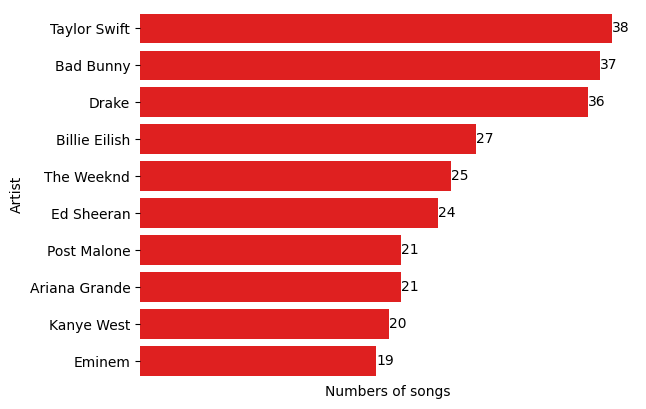

In [98]:
ax = sns.barplot(data=data2,x='count',y='Artist',color='red')
ax.bar_label(ax.containers[0])
sns.despine(left=True,bottom=True)
plt.xticks([],[])
ax = plt.xlabel('Numbers of songs',labelpad=4)

# what is the most streamed songs

In [111]:
data5 = df[['Artist','Streams']].groupby('Artist').sum().nlargest(10,columns='Streams')
data5

,Streams
Artist,
Drake,29633804177
The Weeknd,28939761191
Ed Sheeran,28774547398
Bad Bunny,28665586274
Taylor Swift,26186296710
Post Malone,24604040715
Billie Eilish,22831647986
Ariana Grande,20655534759
Eminem,19013189172


([], [])

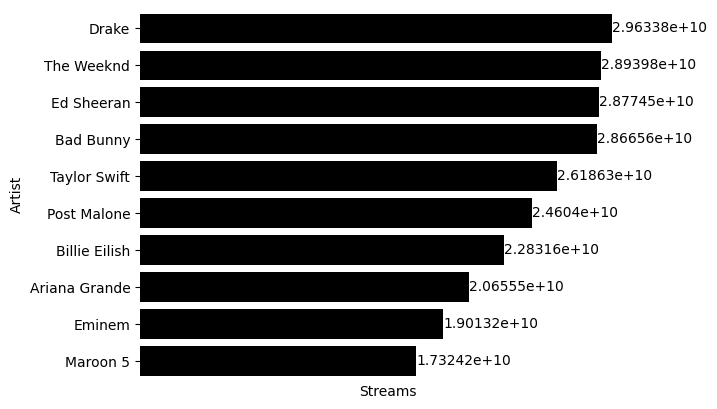

In [112]:
ax = sns.barplot(data5, y=data5.index, x='Streams',color="black")
ax.bar_label(ax.containers[0])
sns.despine(left=True,bottom=True)
plt.xticks([],[])

In [101]:
data

,Artist,Title,Streams
0,The Weeknd,Blinding Lights,3783983806
1,Ed Sheeran,Shape of You,3616649759
2,Lewis Capaldi,Someone You Loved,2958875491
3,Post Malone,Sunflower,2898311408
4,Tones And I,Dance Monkey,2896024418
5,Drake,One Dance,2770548672
6,Post Malone,rockstar,2763808309
7,The Kid LAROI,STAY,2738183590
8,The Weeknd,Starboy,2658550411
9,Imagine Dragons,Believer,2654895028


In [102]:
Artist_list = data['Artist'].to_list()
Artist_list


['The Weeknd',
 'Ed Sheeran',
 'Lewis Capaldi',
 'Post Malone',
 'Tones And I',
 'Drake',
 'Post Malone',
 'The Kid LAROI',
 'The Weeknd',
 'Imagine Dragons']

# lineplot for ed sheeran

In [103]:
df.head()

,Artist and Title,Streams,Daily,Artist,Title
0,The Weeknd - Blinding Lights,3783983806,1736378,The Weeknd,Blinding Lights
1,Ed Sheeran - Shape of You,3616649759,1135140,Ed Sheeran,Shape of You
2,Lewis Capaldi - Someone You Loved,2958875491,1522093,Lewis Capaldi,Someone You Loved
3,Post Malone - Sunflower,2898311408,1871177,Post Malone,Sunflower
4,Tones And I - Dance Monkey,2896024418,666818,Tones And I,Dance Monkey


In [104]:
Ed_Sheeran = df[df['Artist'] == 'Ed Sheeran']
Ed_Sheeran.head()

,Artist and Title,Streams,Daily,Artist,Title
1,Ed Sheeran - Shape of You,3616649759,1135140,Ed Sheeran,Shape of You
13,Ed Sheeran - Perfect,2621255983,1284093,Ed Sheeran,Perfect
22,Ed Sheeran - Thinking out Loud,2313415794,698115,Ed Sheeran,Thinking out Loud
24,Ed Sheeran - Photograph,2280210098,909945,Ed Sheeran,Photograph
89,Ed Sheeran - I Don't Care,1721455109,371220,Ed Sheeran,I Don't Care


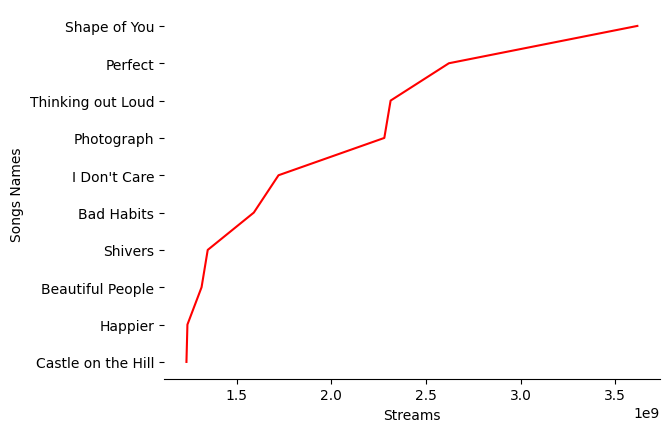

In [105]:

sns.lineplot(data= Ed_Sheeran.head(10), x='Streams' ,y= 'Title', color='r' )
plt.ylabel('Songs Names')
sns.despine(left=True)


# line plot for some Artist and his Songs

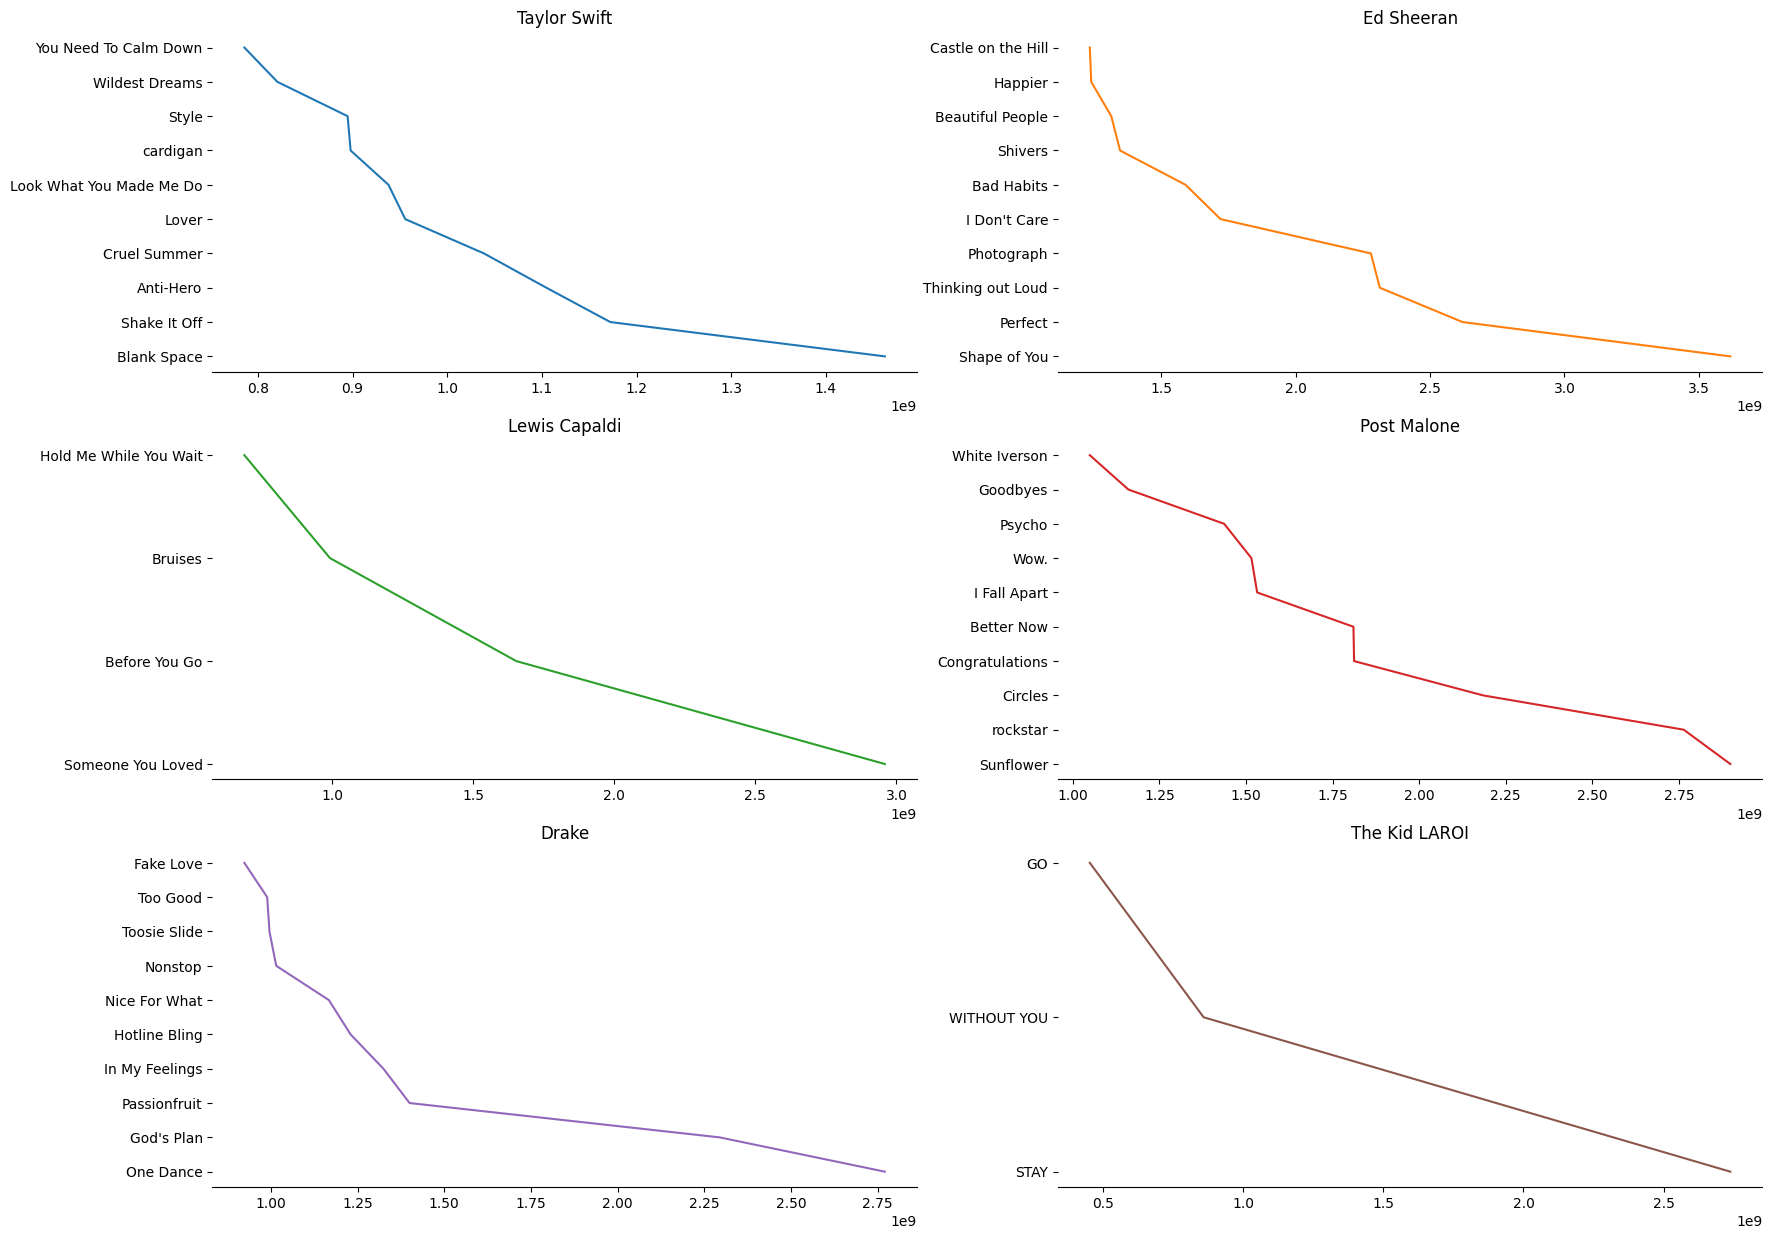

In [106]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
uni_artist = ['Taylor Swift', 'Ed Sheeran', 'Lewis Capaldi', 'Post Malone', 'Drake', 'The Kid LAROI']
for i in range(3):
    for j in range(2):
        current_artist = uni_artist[i * 2 + j]
        my_df = df[df['Artist'] == current_artist].head(10)
        ax[i, j].plot(my_df['Streams'], my_df['Title'], color=colors[i * 2 + j])
        ax[i, j].set_title(current_artist)
        sns.despine(left=True)


# boxplot of all songs by steams and dialy columns

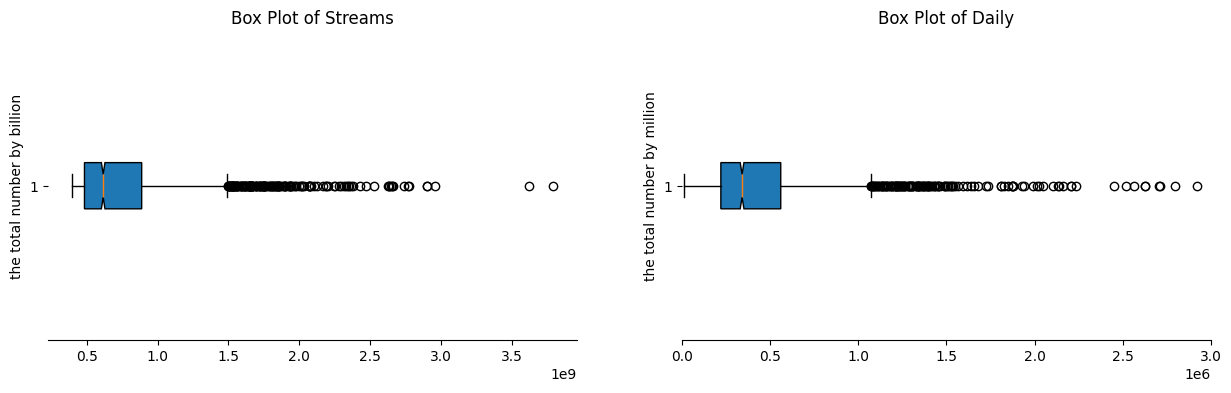

In [107]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
axs[0].boxplot(df['Streams'],patch_artist = True,notch ='True', vert = 0)
axs[1].boxplot(df['Daily'],patch_artist = True,notch ='True', vert = 0)
axs[0].set_title('Box Plot of Streams')
axs[1].set_title('Box Plot of Daily')
axs[1].set_xlim(0, 3000000)
axs[0].set_xlabel('')
axs[0].set_ylabel('the total number by billion')
axs[1].set_xlabel(' ')
axs[1].set_ylabel('the total number by million')
sns.despine(left=True)
plt.show()

In [108]:
df.head()

,Artist and Title,Streams,Daily,Artist,Title
0,The Weeknd - Blinding Lights,3783983806,1736378,The Weeknd,Blinding Lights
1,Ed Sheeran - Shape of You,3616649759,1135140,Ed Sheeran,Shape of You
2,Lewis Capaldi - Someone You Loved,2958875491,1522093,Lewis Capaldi,Someone You Loved
3,Post Malone - Sunflower,2898311408,1871177,Post Malone,Sunflower
4,Tones And I - Dance Monkey,2896024418,666818,Tones And I,Dance Monkey


# barplot for most 10 popular songs by Streams

In [109]:
data3 = df[['Title','Streams','Artist']].nlargest(10,columns='Streams')
data3

,Title,Streams,Artist
0,Blinding Lights,3783983806,The Weeknd
1,Shape of You,3616649759,Ed Sheeran
2,Someone You Loved,2958875491,Lewis Capaldi
3,Sunflower,2898311408,Post Malone
4,Dance Monkey,2896024418,Tones And I
5,One Dance,2770548672,Drake
6,rockstar,2763808309,Post Malone
7,STAY,2738183590,The Kid LAROI
8,Starboy,2658550411,The Weeknd
9,Believer,2654895028,Imagine Dragons


([], [])

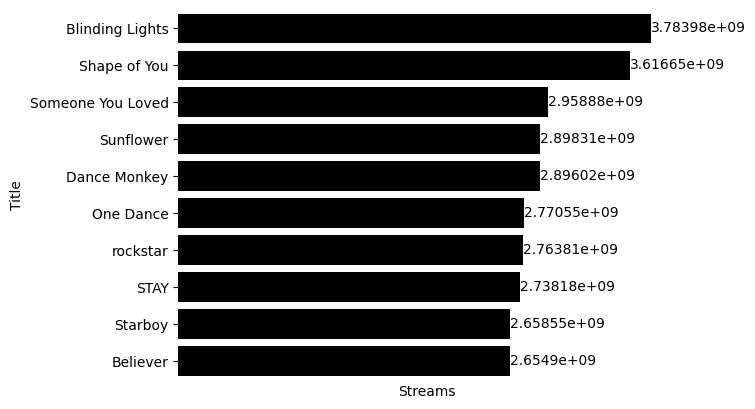

In [110]:
ax = sns.barplot(data=data3, y='Title', x='Streams', color='black')
ax.bar_label(ax.containers[0])
sns.despine(left=True, bottom=True)
plt.xticks([],[])
